* 구글 드라이브 내에서 실행하는 폴더 및 파일을 압축하여 메일에 함께 첨부했습니다.  
* EDA 및 모델 구현은 Colab 무료버전에서 실행했습니다.  
* 첨부한 압축파일을 압축해제하여, 구글 드라이브에 업로드 한 후, 실행할 수 있습니다.  




In [ ]:
# 구글 드라이브에 저장된 파일을 사용하기 위한 코드
from google.colab import drive
drive.mount('/content/drive')

# 저장된 파일의 경로 설정
%cd /content/drive/MyDrive/agency_data/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/agency_data


# Import Library

In [ ]:
# !pip install graphviz
# !pip install statsmodels
# !pip install xgboost

In [ ]:
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline

#Scaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
#data split
from sklearn.model_selection import train_test_split, cross_val_score
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import GridSearchCV

#주성분 분석
from sklearn.decomposition import PCA
import statsmodels.api as sm

#회귀 분석
from sklearn.linear_model import LinearRegression
#후진제거법
from sklearn.feature_selection import RFE

#회귀
#Decision tree
from sklearn.tree import DecisionTreeRegressor
#Random Forest/Gradient
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ARIMA/시계열
from statsmodels.tsa.arima_model import ARIMA
#회귀분석
from statsmodels.formula.api import ols
#선형모델 formula(y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #r2_score = 분류
from statsmodels.tools.eval_measures import rmse
#로지스틱 회귀
from statsmodels.api import Logit

#분류
#로지스틱 회귀
from sklearn.linear_model import LogisticRegression
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
#랜덤포레스트/그래디언트부스트
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#엑스지부스트
from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier
#SVM
from sklearn.svm import SVC
#분류 NN (MLP)
from sklearn.neural_network import MLPClassifier
#KNN 분류
from sklearn.neighbors import KNeighborsClassifier
#분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

#사용할 함수 선언
#RSME: root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
#MAPE: mean absolutre percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100
#XG Boost에서 사용할 정확도 표현 함수
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precesion = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬 \n',confusion, '\n')
    print('정확도: ', accuracy)
    print('정밀도: ', precesion)
    print('재현율: ', recall)
    print('F1: ', F1)
    print('AUC: ', AUC)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

import matplotlib.font_manager as fm

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 읽기

In [ ]:
df_raw_choose_dummy = pd.read_csv('df_raw_choose_dummy.csv')
df_raw_ch = pd.read_csv('df_raw_ch.csv')
new = pd.read_csv('new.csv')

df_raw_choose_dummy

Gender  Age  Married  Dependents  noDependents  Referrals  noReferrals  \
0          1   37        1           0             0          1            2   
1          0   46        0           0             0          0            0   
2          0   50        0           0             0          0            0   
3          0   78        1           0             0          1            1   
4          1   75        1           0             0          1            3   
...      ...  ...      ...         ...           ...        ...          ...   
6854       1   20        0           0             0          0            0   
6855       0   40        1           0             0          1            1   
6856       0   22        0           0             0          0            0   
6857       0   21        0           0             0          1            5   
6858       0   36        1           0             0          1            1   

      PaperlessBilling  OnlineSecurity  OnlineBackup  ...  \
0                    1               0             1  ...   
1                    0               0             0  ...   
2                    1               0             0  ...   
3                    1               0             1  ...   
4                    1               0             0  ...   
...                ...             ...           ...  ...   
6854                 0               1             0  ...   
6855                 1               0             0  ...   
6856                 1               0             1  ...   
6857                 0               1             0  ...   
6858                 0               1             1  ...   

      ServiceCombination_OnlineSecurity&OnlineBackup  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
6854                                               0   
6855                                               0   
6856                                               0   
6857                                               0   
6858                                               0   

      ServiceCombination_OnlineSecurity&OnlineBackup&TechSupport  \
0                                                     0            
1                                                     0            
2                                                     0            
3                                                     0            
4                                                     0            
...                                                 ...            
6854                                                  0            
6855                                                  0            
6856                                                  0            
6857                                                  0            
6858                                                  0            

      ServiceCombination_OnlineSecurity&OnlineBackup&TechSupport&UnlimitedData  \
0                                                     0                          
1                                                     0                          
2                                                     0                          
3                                                     0                          
4                                                     0                          
...                                                 ...                          
6854                                                  0                          
6855                                                  0                          
6856                                                  0                          
68

In [ ]:
df_raw_ch

Gender  Age AgeGroup  Married  Dependents  noDependents  Referrals  \
0          1   37      30대        1           0             0          1   
1          0   46      40대        0           0             0          0   
2          0   50      50대        0           0             0          0   
3          0   78      70대        1           0             0          1   
4          1   75      70대        1           0             0          1   
...      ...  ...      ...      ...         ...           ...        ...   
6854       1   20      20대        0           0             0          0   
6855       0   40      40대        1           0             0          1   
6856       0   22      20대        0           0             0          0   
6857       0   21      20대        0           0             0          1   
6858       0   36      30대        1           0             0          1   

      noReferrals  PaperlessBilling PaymentMethod  ...  ChurnLabel  \
0               2                 1          신용카드  ...           0   
1               0                 0          신용카드  ...           0   
2               0                 1          계좌이체  ...           1   
3               1                 1          계좌이체  ...           1   
4               3                 1          신용카드  ...           1   
...           ...               ...           ...  ...         ...   
6854            0                 0          신용카드  ...           0   
6855            1                 1          계좌이체  ...           1   
6856            0                 1          신용카드  ...           0   
6857            5                 0          신용카드  ...           0   
6858            1                 0          계좌이체  ...           0   

      CustomerLTV  TotalExtraDataCharge  AvgRoamCharge  TotalRoamCharge  \
0            2205                     0          47910           431100   
1            5414                 11300          12090           108710   
2            4479                     0          38080           152100   
3            3714                     0          31410           408720   
4            3464                     0           8360            24970   
...           ...                   ...            ...              ...   
6854         3161                     0          52770           685680   
6855         5248                     0          18310           402730   
6856         5870                     0          21020            42040   
6857         4792                     0           2370           160460   
6858         5639                     0              0                0   

      Tenure_month  Sum_charge  Monthly_charge  ServicesSubscribed  \
0               21     1755400    83590.476190                   3   
1               21     1447500    68928.571429                   0   
2                5      490900    98180.000000                   1   
3               14     1578400   112742.857143                   2   
4                4      378000    94500.000000                   2   
...            ...         ...             ...                 ...   
6854            25     1610700    64428.000000                   3   
6855            23     2343500   101891.304348                   1   
6856            14      792400    56600.000000                   2   
6857            79     6328500    80107.594937                   3   
6858            75     5196100    69281.333333                   3   

                             ServiceCombination  
0        OnlineBackup&TechSupport&UnlimitedData  
1                                 No Subscribed  
2                                 UnlimitedData  
3                    OnlineBackup&UnlimitedData  
4                     TechSupport&UnlimitedData  
...                                         ...  
6854   OnlineSecurity&TechSupport&UnlimitedData  
6855                              UnlimitedData  
6856                 OnlineBackup&UnlimitedData  
6857   Onl

In [ ]:
new

UnlimitedData  ServiceCombination_OnlineBackup&UnlimitedData  \
0                 1                                              0   
1                 0                                              0   
2                 1                                              0   
3                 1                                              1   
4                 1                                              0   
...             ...                                            ...   
6854              1                                              0   
6855              1                                              0   
6856              1                                              1   
6857              1                                              0   
6858              1                                              0   

      ServiceCombination_OnlineSecurity&OnlineBackup&UnlimitedData  \
0                                                     0              
1                                                     0              
2                                                     0              
3                                                     0              
4                                                     0              
...                                                 ...              
6854                                                  0              
6855                                                  0              
6856                                                  0              
6857                                                  0              
6858                                                  1              

      TotalExtraDataCharge  ServiceCombination_UnlimitedData  TechSupport  \
0                        0                                 0            1   
1                    11300                                 0            0   
2                        0                                 1            0   
3                        0                                 0            0   
4                        0                                 0            1   
...                    ...                               ...          ...   
6854                     0                                 0            1   
6855                     0                                 1            0   
6856                     0                                 0            0   
6857                     0                                 0            1   
6858                     0                                 0            0   

      PaymentMethod_신용카드  PaymentMethod_계좌이체  AgeGroup_30대  AvgRoamCharge  \
0                      1                   0             1          47910   
1                      1                   0             0          12090   
2                      0                   1             0          38080   
3                      0                   1             0          31410   
4                      1                   0             0           8360   
...                  ...                 ...           ...            ...   
6854                   1                   0             0          52770   
6855                   0                   1             0          18310   
6856                   1                   0             0          21020   
6857                   1                   0             0           2370   
6858                   0                   1             1              0   

      ...  noDependents  TotalRoamCharge  PaperlessBilling  Monthly_charge  \
0     ...             0           431100                 1    83590.476190   
1     ...             0           108710                 0    68928.571429   
2     ...             0           152100                 1    98180.000000   
3     ...             0           408720                 1   112742.857143   
4     ...             0            24970                 1    94500.000000   
...   

# 이탈 예측 모델

최종모델 : XGBoost, 정확도 96.35%




In [ ]:
# 데이터 전처리 방법 2
X = new.drop(['ChurnLabel'], axis=1)
y = new['ChurnLabel']
columns = X.columns

# 학습/테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y)

from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=1234)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

# 추가 데이터 분할 (검증용)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_over, y_train_over, test_size = 0.3, random_state = 1234, stratify=y_train_over)

In [ ]:
# 최종 모델
final_model = XGBClassifier(max_depth = 4, learning_rate = 0.43, n_estimators= 240,random_state=1234)
final_model.fit(x_train, y_train)
print('Accuracy on training set:', final_model.score(x_train, y_train))
y_valid_pred = final_model.predict(x_valid)
print('Accuracy on validation set:', final_model.score(x_valid, y_valid))
y_test_pred = final_model.predict(x_test)
print('Accuracy on test set:', final_model.score(x_test, y_test))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(y_test, y_test_pred)))

Accuracy on training set: 1.0
Accuracy on validation set: 0.976915974145891
Accuracy on test set: 0.9635568513119533
Confusion matrix: 
[[1516   32]
 [  43  467]]


- 변수가 예측에 얼마나 큰 영향을 미친지는 파악이 되지만, 해당 변수가 긍정적인 방향으로, 부정적인 방향으로 영향을 미쳤는지는 알 수 없음.
- 이에 따라, 더 자세한 영향도 분석이 필요하다고 판단함.

In [ ]:
# X = new.drop(['ChurnLabel'], axis=1)
# y = new['ChurnLabel']
# columns = X.columns

# y_predict = final_model.predict(X)
# print('Accuracy:', final_model.score(X, y))
# print('Confusion Matrix:\n', confusion_matrix(y, y_predict))

# new1 = new.copy()
# new1['Y_predict'] = np.NaN

# for i in range(len(new1)):
#     new1['Y_predict'][i] = y_predict[i]

# # X값과 y값으로 데이터 분리
# data = new1.copy()
# X = data.drop(['ChurnLabel','Y_predict'],axis=1)
# y0 = data['ChurnLabel']
# y1 = data['Y_predict']

Accuracy: 0.982796325995043
Confusion Matrix:
 [[5102   56]
 [  62 1639]]


# 이탈위험군 데이터셋 생성
- 소제목 : 이탈하지 않은 고객 중 이탈할 고객 예측하기

In [ ]:
#### 표준화된 데이터 ####
new_churn = new[new['ChurnLabel'] == 0]
new_churn.reset_index(drop=True, inplace=True)

new_churn_x = new_churn.drop(["ChurnLabel"], axis = 1) #목표변수 외
new_churn_y = new_churn["ChurnLabel"] #목표변수

이탈 여부를 확인을 위한 y_predict

In [ ]:
#최종 모델을 이용하여 이탈하지 않는 고객 중 이탈할 고객 예측하기
y_predict = final_model.predict(new_churn_x)

print('Accuracy:', final_model.score(new_churn_x, new_churn_y))
print('Confusion Matrix:\n', confusion_matrix(new_churn_y, y_predict))

Accuracy: 0.9891430787126794
Confusion Matrix:
 [[5102   56]
 [   0    0]]


`Y_predict = 1`일 때, 이탈

In [ ]:
#df_raw_chosen dataFrame에 Y_predict열 추가
df_raw_chosen_sa = df_raw_ch[df_raw_ch['ChurnLabel'] == 0] ## (5158 rows × 21 columns)
df_raw_chosen_sa.reset_index(drop=True, inplace=True)
df_raw_chosen_sa['Y_predict'] = np.NaN
new_churn['Y_predict'] = np.NaN

for i in range(len(df_raw_chosen_sa)):
    df_raw_chosen_sa['Y_predict'][i] = y_predict[i]
    new_churn['Y_predict'][i] = y_predict[i]

print(df_raw_chosen_sa['Y_predict'].value_counts())
print(new_churn['Y_predict'].value_counts())

Y_predict
0.0    5102
1.0      56
Name: count, dtype: int64
Y_predict
0.0    5102
1.0      56
Name: count, dtype: int64


이탈 위험군 고객은 56 명이다.

In [ ]:
#이탈할 고객 df_raw_chosen_danger 로 저장
df_raw_chosen_danger = new_churn[new_churn['Y_predict']==1]
df_raw_chosen_danger.head()

UnlimitedData  ServiceCombination_OnlineBackup&UnlimitedData  \
67               1                                              1   
200              1                                              1   
700              1                                              0   
811              1                                              1   
902              1                                              1   

     ServiceCombination_OnlineSecurity&OnlineBackup&UnlimitedData  \
67                                                   0              
200                                                  0              
700                                                  0              
811                                                  0              
902                                                  0              

     TotalExtraDataCharge  ServiceCombination_UnlimitedData  TechSupport  \
67                      0                                 0            0   
200                     0                                 0            0   
700                     0                                 0            1   
811                     0                                 0            0   
902                     0                                 0            0   

     PaymentMethod_신용카드  PaymentMethod_계좌이체  AgeGroup_30대  AvgRoamCharge  ...  \
67                    0                   1             0           3390  ...   
200                   0                   1             0          13560  ...   
700                   0                   1             0           3050  ...   
811                   1                   0             0              0  ...   
902                   0                   1             0          33670  ...   

     TotalRoamCharge  PaperlessBilling  Monthly_charge  Married  Referrals  \
67             90630                 1   103689.743590        0          0   
200           421380                 1    99860.465116        1          1   
700             3050                 1   108930.769231        0          0   
811                0                 1    64968.750000        0          0   
902          1515900                 1   129719.298246        1          0   

     noReferrals  Dependents  Tenure_month  ChurnLabel  Y_predict  
67             0           0            39           0        1.0  
200            1           0            43           0        1.0  
700            0           0            13           0        1.0  
811            0           0            16           0        1.0  
902            0           0            57           0        1.0  

[5 rows x 22 columns]



---



# 이탈 위험군 대상 이탈 영향 인자 분석

## SHAP 모델

### 1. 데이터 준비

In [ ]:
!pip install shap

In [ ]:
# X값과 y값으로 데이터 분리
data = df_raw_chosen_danger.copy()
X = data.drop(['ChurnLabel','Y_predict'],axis=1)
y0 = data['ChurnLabel']
y1 = data['Y_predict']

### 2. 각 특성이 모델 예측에 미치는 영향 분석

In [ ]:
import shap

# SHAP 값을 사용하여 각 특성이 모델 예측에 미치는 영향 분석
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X)

#### 2-1. 전체 검증 데이터 셋에 대해서 적용

In [ ]:
# 전체 검증 데이터 셋에 대해서 적용
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

#### 2-2. 개별 데이터 셋에 대해서 적용
- 개인 고객의 이탈 영향 인자 분석
- Higher SHAP 값: 특성이 높은 값을 가질수록 이탈하지 않는 데 중요한 역할
- Lower SHAP 값: 이 특성이 낮은 값을 가질수록 이탈하는 데 중요한 역할

In [ ]:
shap.initjs()  # JS 시각화 라이브러리 로드

# 1번부터 20번째 고객 샘플 시각화
for i in range(1,21):
    display(shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:]))

In [ ]:
# JS 시각화 라이브러리 로드
shap.initjs()
# 36번째 고객 샘플 시각화
shap.force_plot(explainer.expected_value, shap_values[36,:], X.iloc[36,:])

#### 2-3. 전체 영향 인자 분석

- 그래프 설명
  - 빨간색: 이탈 확률이 높다
    - SHAP값이 음수인데 빨간색이다 → 값이 작을수록 이탈 확률이 높다
    - SHAP값이 양수인데 빨간색이다 → 값이 클수록 이탈 확률이 높다

  - 파란색 : 이탈 확률이 낮다
    - 빨간색과 반대


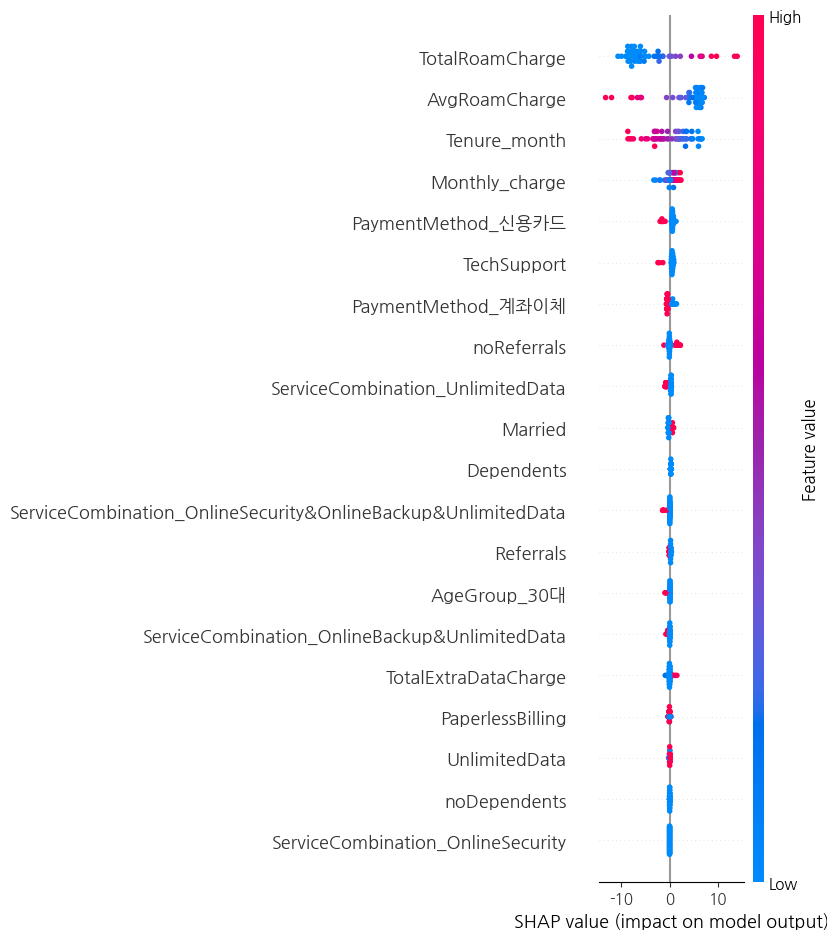

In [ ]:
# summary
shap.summary_plot(shap_values, X)

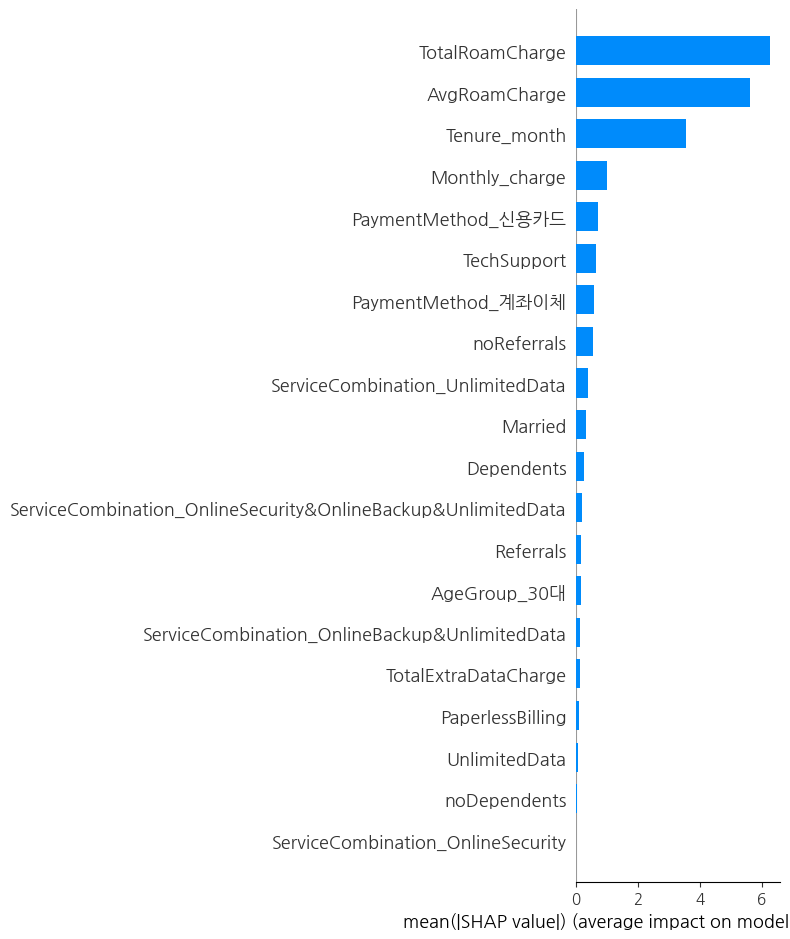

In [ ]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
## 절댓값으로 구해짐. 절대적인 영향을 알 수 있음.

shap.summary_plot(shap_values, X, plot_type = "bar")

- 통신사 사용기간이 짧을수록 이탈 가능성이 높음.
- 추천 횟수가 적을수록 이탈 확률 높음
- 월 납부금이 많을수록, 신용카드로 납부할 수록 이탈함.


## 수치 기반 이탈 영향 인자 선정

- 평균 SHAP 값이 양수인 경우, 해당 변수의 증가가 이탈 가능성을 증가시키는 경향
- 평균 SHAP 값이 음수인 경우, 해당 변수의 증가가 이탈 가능성을 감소시키는 경향

##### 평균 SHAP 값

In [ ]:
 # SHAP 값이 양수
## 상위 10개의 특성 확인
shap_mean_values=shap_values.mean(axis=0)
feature_idx =  shap_mean_values.argsort()[::-1][:10]
feature = X.columns[feature_idx]

for i in range(10):
  feat = feature[i]
  shap_value = shap_mean_values[feature_idx[i]]
  print(f"SHAP 값이 높은 상위 {i+1}번째: {feat} (SHAP: {shap_value})")

SHAP 값이 높은 상위 1번째: AvgRoamCharge (SHAP: 3.4783360958099365)
SHAP 값이 높은 상위 2번째: Monthly_charge (SHAP: 0.504548966884613)
SHAP 값이 높은 상위 3번째: TechSupport (SHAP: 0.41824790835380554)
SHAP 값이 높은 상위 4번째: noReferrals (SHAP: 0.39765796065330505)
SHAP 값이 높은 상위 5번째: PaymentMethod_신용카드 (SHAP: 0.2862255871295929)
SHAP 값이 높은 상위 6번째: Dependents (SHAP: 0.2514699101448059)
SHAP 값이 높은 상위 7번째: Tenure_month (SHAP: 0.19989164173603058)
SHAP 값이 높은 상위 8번째: Referrals (SHAP: 0.14303717017173767)
SHAP 값이 높은 상위 9번째: TotalExtraDataCharge (SHAP: 0.060169268399477005)
SHAP 값이 높은 상위 10번째: Married (SHAP: 0.03922518715262413)


In [ ]:
 # SHAP 값이 음수
## 하위 10개의 특성 확인
shap_mean_values=shap_values.mean(axis=0)
feature_idx =  shap_mean_values.argsort()[::-1][-10:]
feature = X.columns[feature_idx]

for i in range(9,-1,-1):
  feat = feature[i]
  shap_value = shap_mean_values[feature_idx[i]]
  print(f"SHAP 값이 낮은 하위 {10-i}번째: {feat} (SHAP: {shap_value})")

SHAP 값이 낮은 하위 1번째: TotalRoamCharge (SHAP: -3.8919336795806885)
SHAP 값이 낮은 하위 2번째: PaymentMethod_계좌이체 (SHAP: -0.13377459347248077)
SHAP 값이 낮은 하위 3번째: ServiceCombination_OnlineSecurity&OnlineBackup&UnlimitedData (SHAP: -0.07546401023864746)
SHAP 값이 낮은 하위 4번째: ServiceCombination_OnlineBackup&UnlimitedData (SHAP: -0.07214467972517014)
SHAP 값이 낮은 하위 5번째: PaperlessBilling (SHAP: -0.03983740136027336)
SHAP 값이 낮은 하위 6번째: AgeGroup_30대 (SHAP: -0.0014616750413551927)
SHAP 값이 낮은 하위 7번째: ServiceCombination_OnlineSecurity (SHAP: 0.0)
SHAP 값이 낮은 하위 8번째: ServiceCombination_UnlimitedData (SHAP: 0.002390459179878235)
SHAP 값이 낮은 하위 9번째: noDependents (SHAP: 0.018105056136846542)
SHAP 값이 낮은 하위 10번째: UnlimitedData (SHAP: 0.023901376873254776)


##### 평균 절댓값 SHAP 값
- 절댓값 SHAP 값이 높은 특성 10개 출력 : 절대적인 영향만을 분석

In [ ]:
# SHAP 값의 평균 절대값을 계산하여 중요한 변수 순으로 정렬
shap_abs_mean = np.abs(shap_values).mean(axis=0)
important_features_idx = shap_abs_mean.argsort()[::-1][:20]
important_features = X.columns[important_features_idx]

for i in range(20):
  feature = important_features[i]
  abs_shap_value = shap_abs_mean[important_features_idx[i]]
  print(f"SHAP 값이 높은 상위 {i+1}번째: {feature} (절댓값 SHAP: {abs_shap_value})")

SHAP 값이 높은 상위 1번째: TotalRoamCharge (절댓값 SHAP: 6.274898052215576)
SHAP 값이 높은 상위 2번째: AvgRoamCharge (절댓값 SHAP: 5.61290979385376)
SHAP 값이 높은 상위 3번째: Tenure_month (절댓값 SHAP: 3.5454812049865723)
SHAP 값이 높은 상위 4번째: Monthly_charge (절댓값 SHAP: 1.0118311643600464)
SHAP 값이 높은 상위 5번째: PaymentMethod_신용카드 (절댓값 SHAP: 0.7202965021133423)
SHAP 값이 높은 상위 6번째: TechSupport (절댓값 SHAP: 0.6283215284347534)
SHAP 값이 높은 상위 7번째: PaymentMethod_계좌이체 (절댓값 SHAP: 0.5642381906509399)
SHAP 값이 높은 상위 8번째: noReferrals (절댓값 SHAP: 0.5566068291664124)
SHAP 값이 높은 상위 9번째: ServiceCombination_UnlimitedData (절댓값 SHAP: 0.3873704969882965)
SHAP 값이 높은 상위 10번째: Married (절댓값 SHAP: 0.3041928708553314)
SHAP 값이 높은 상위 11번째: Dependents (절댓값 SHAP: 0.2514699101448059)
SHAP 값이 높은 상위 12번째: ServiceCombination_OnlineSecurity&OnlineBackup&UnlimitedData (절댓값 SHAP: 0.18086639046669006)
SHAP 값이 높은 상위 13번째: Referrals (절댓값 SHAP: 0.1732977330684662)
SHAP 값이 높은 상위 14번째: AgeGroup_30대 (절댓값 SHAP: 0.14278961718082428)
SHAP 값이 높은 상위 15번째: ServiceCombination_O

핵심인자로
- Monthly_charge(월납부금)
- noReferrals(추천횟수)
- PaymentMethod(납부 방식)
- Dependents(부양자 여부)
- Tenure_month(계약기간)
- ServiceCombination(결합 서비스 종류) 선정.



##### 개별 변수의 영향 확인

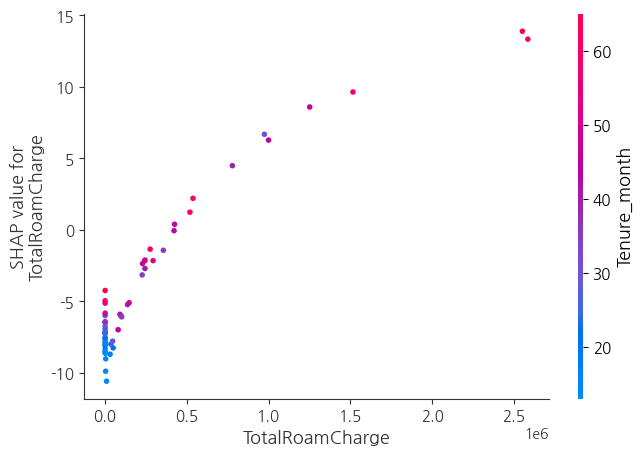

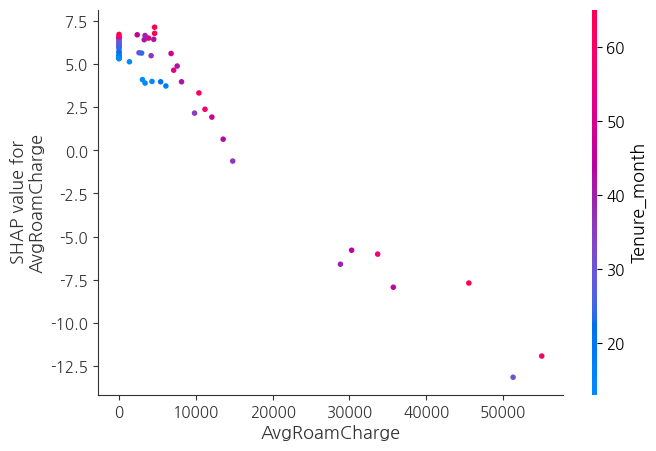

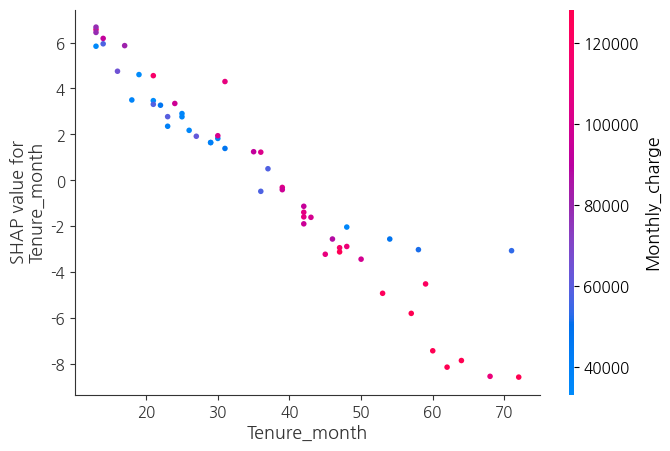

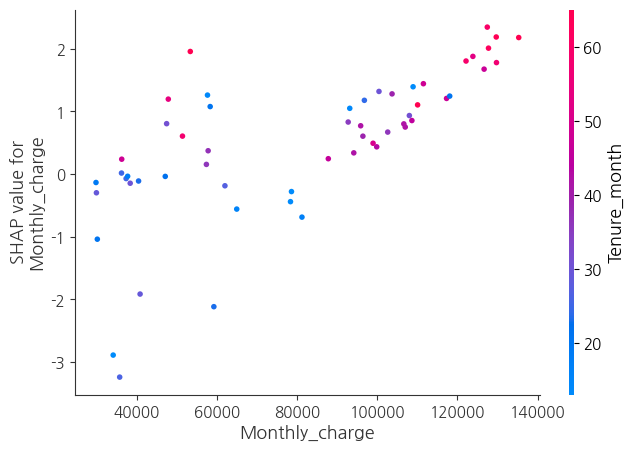

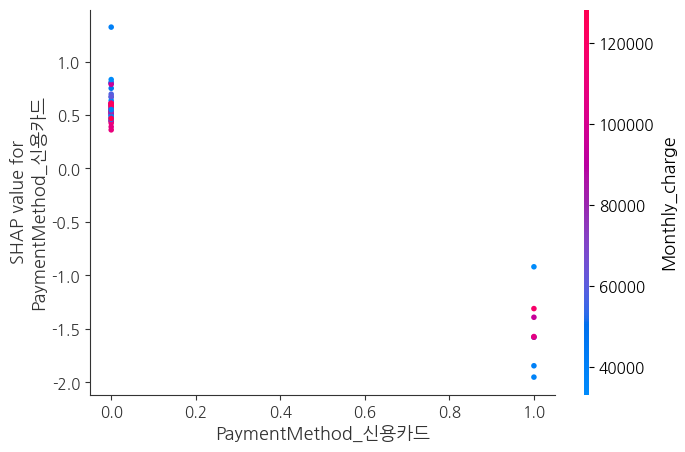

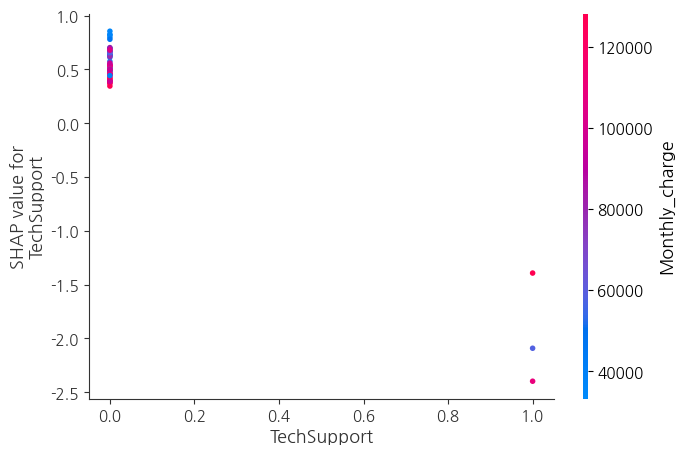

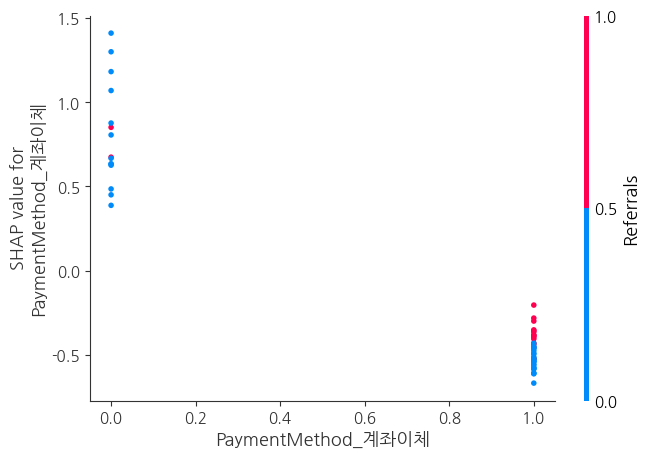

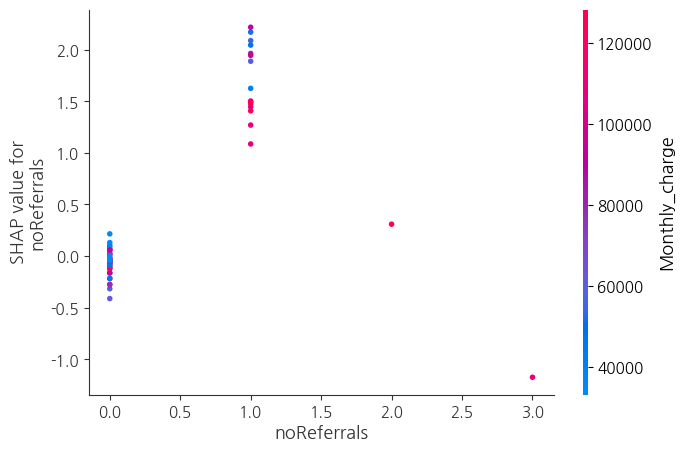

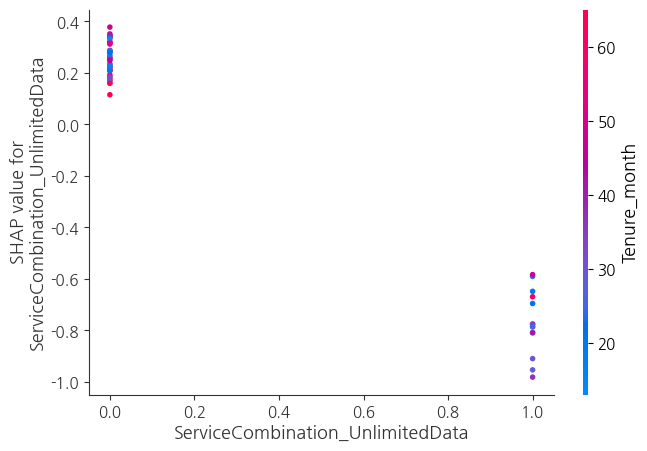

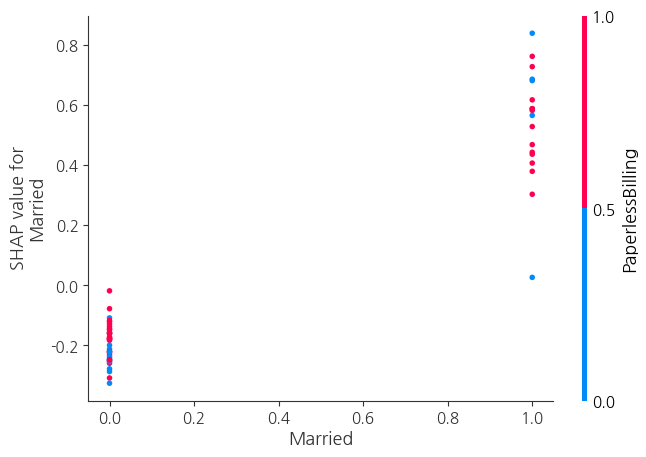

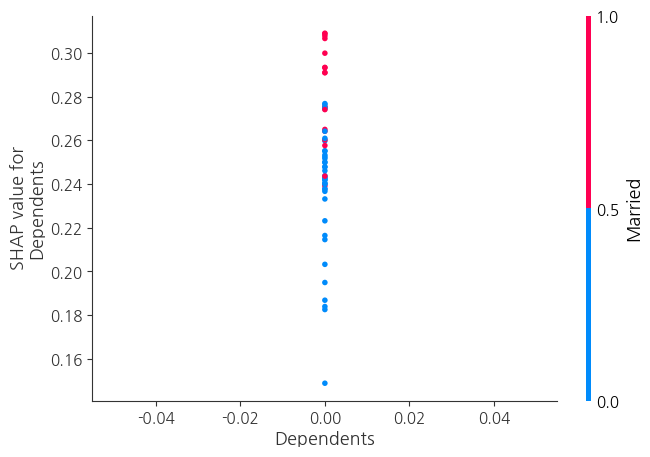

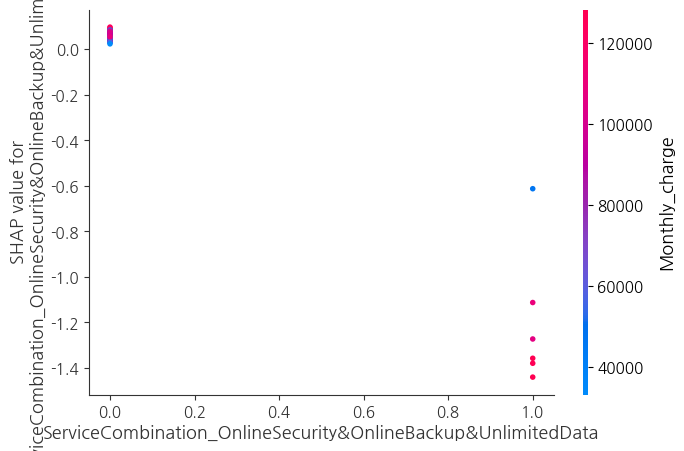

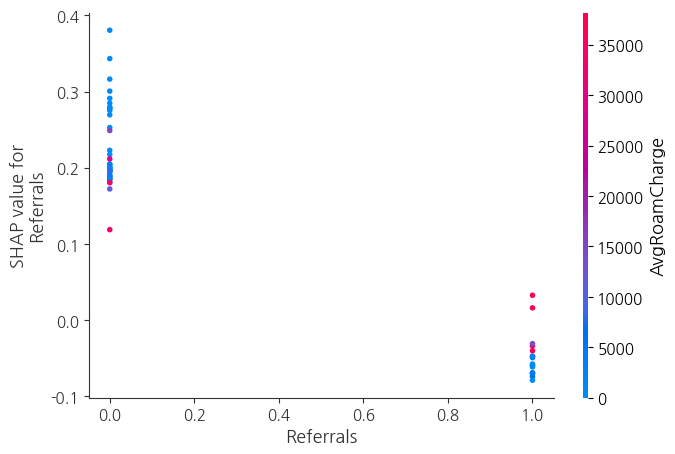

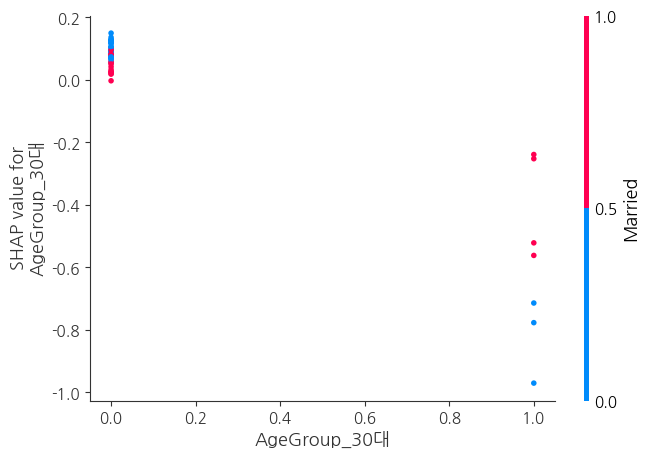

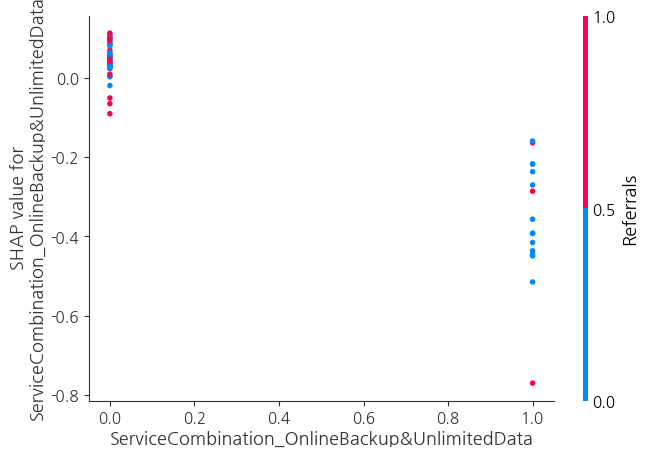

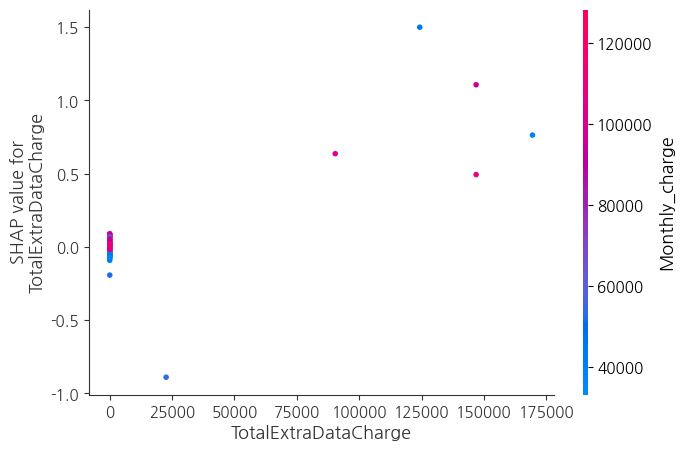

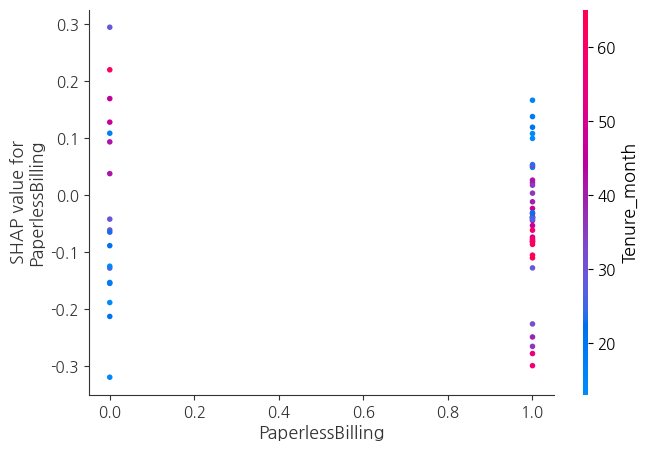

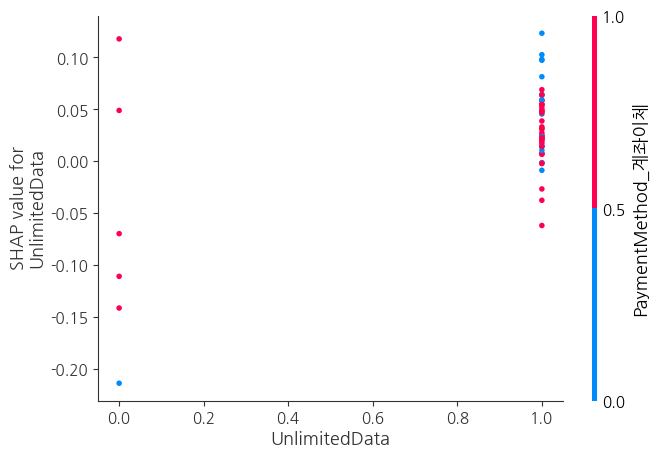

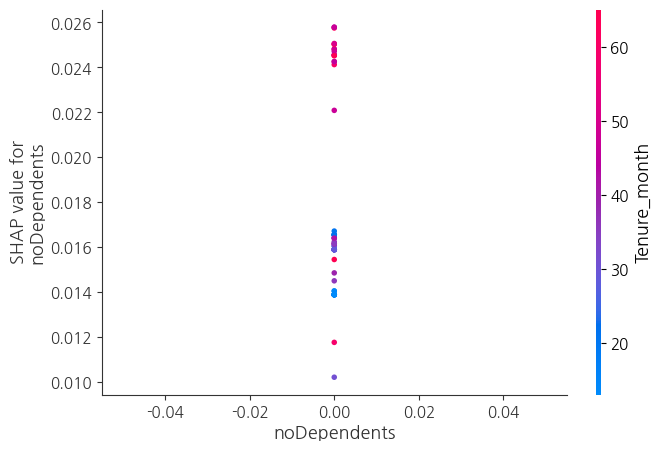

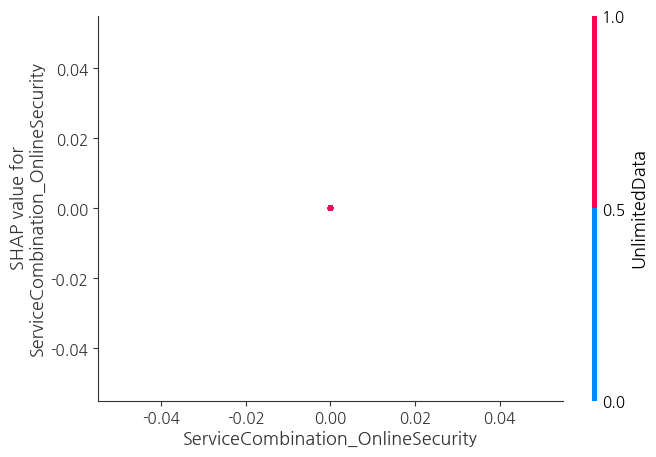

In [ ]:
for feature in important_features:
    shap.dependence_plot(feature, shap_values, X)

핵심인자로 Tenure_month(계약기간), Monthly_charge(월납부금), noReferrals(추천횟수), PaymentMethod(납부 방식), Dependents(부양자 여부), ServiceCombination(결합 서비스 종류) 선정.


# 핵심인자 분석

## 1. 계약기간

- 전체 고객의 계약기간별 이탈률

In [ ]:
# Tenure_month 값에 따라 범위로 나누기
df_raw1=pd.read_csv('df_raw.csv')
df_raw1['Tenure_month_range'] = pd.cut(df_raw1['Tenure_month'], bins=[0, 6, 12, 18, 24, 36, 48, 72, float('inf')],
                                      labels=['6개월 이내', '1년 이내', '1년6개월 이내', '2년 이내','3년 이내', '4년 이내', '6년 이내', '6년 이상'],
                                       right=True)
result = pd.crosstab(df_raw1.ChurnLabel, df_raw1.Tenure_month_range)

# 각 범위별 이탈 확률 계산
total_customers = df_raw1.shape[0]
tenure_range_counts = df_raw1['Tenure_month_range'].value_counts()

# 각 범위별 이탈 고객 수 계산
def calculate_churn_rate(range_name):
    churn_count = df_raw1[(df_raw1['ChurnLabel'] == 'Yes') & (df_raw1['Tenure_month_range'] == range_name)].shape[0]
    return churn_count / tenure_range_counts[range_name]

churn_rates = {}
for range_name in tenure_range_counts.index:
    churn_rates[range_name] = round(calculate_churn_rate(range_name),3)*100

churn_rate_row = pd.Series(churn_rates, name='이탈 확률')
result_with_churn_rate = pd.concat([result, churn_rate_row.to_frame().T])

result_with_churn_rate

6개월 이내  1년 이내  1년6개월 이내  2년 이내  3년 이내  4년 이내   6년 이내   6년 이상
No        0.0    0.0     685.0  452.0  730.0  650.0  1328.0  1313.0
Yes     576.0  255.0     191.0  118.0  193.0  146.0   216.0     6.0
이탈 확률   100.0  100.0      21.8   20.7   20.9   18.3    14.0     0.5

- 기존 고객의 계약 기간별 이탈률

In [ ]:
## Tenure_month 값에 따라 범위로 나누기
# 6개월 이내, 1년 이내 고객 없음.

df_raw_chosen_sa1=df_raw_chosen_sa.copy()
df_raw_chosen_sa1['Tenure_month_range'] = pd.cut(df_raw_chosen_sa1['Tenure_month'], bins=[12, 18, 24, 36, 48, 72, float('inf')],
                                      labels=['1년6개월 이내', '2년 이내','3년 이내', '4년 이내', '6년 이내', '6년 이상'], right=True)
result = pd.crosstab(df_raw_chosen_sa1['Y_predict'], df_raw_chosen_sa1['Tenure_month_range'])

# 각 범위별 이탈 확률 계산
total_customers = df_raw_chosen_sa1.shape[0]
tenure_range_counts = df_raw_chosen_sa1['Tenure_month_range'].value_counts()

def calculate_churn_rate(range_name):
    churn_count = df_raw_chosen_sa1[(df_raw_chosen_sa1['Y_predict'] == 1) &
                                    (df_raw_chosen_sa1['Tenure_month_range'] == range_name)].shape[0]
    return churn_count / tenure_range_counts[range_name]

churn_rates = {}
for range_name in tenure_range_counts.index:
    churn_rates[range_name] = round(calculate_churn_rate(range_name), 3) * 100

# 계산된 이탈 확률을 새로운 행에 추가
churn_rate_row = pd.Series(churn_rates, name='이탈 확률')
result_with_churn_rate = pd.concat([result, churn_rate_row.to_frame().T])

result_with_churn_rate

1년6개월 이내  2년 이내  3년 이내  4년 이내   6년 이내   6년 이상
0.0       676.0  444.0  717.0  636.0  1316.0  1313.0
1.0         9.0    8.0   13.0   14.0    12.0     0.0
이탈 확률       1.3    1.8    1.8    2.2     0.9     0.0

전체 고객에게는 계약기간이 이탈 여부에 큰 영향을 미치지만, 기존 고객에게는 큰 영향을 미치지 않음.
- 계약 기간에 따라 등급제 운영
- 계약 기간이 길수록 이탈률이 줄어들게 되므로, 계약 기간에 따라 요금을 차등 분배하고 고객에게 선택권 부여함. 재계약 시, 시장 환경에 따라 요금은 달라지지만 같은 업계에서 최고 수준으로 혜택 부여.

## 2. 추천 횟수

- 전체 고객의 추천횟수별 이탈률

In [ ]:
result = pd.crosstab(df_raw1.ChurnLabel, df_raw1.noReferrals)

# 각 범위별 이탈 확률 계산
total_customers = df_raw1.shape[0]
tenure_range_counts = df_raw1['noReferrals'].value_counts()

# 각 범위별 이탈 고객 수 계산
def calculate_churn_rate(range_name):
    churn_count = df_raw1[(df_raw1['ChurnLabel'] == 'Yes') & (df_raw1['noReferrals'] == range_name)].shape[0]
    return churn_count / tenure_range_counts[range_name]

churn_rates = {}
for range_name in tenure_range_counts.index:
    churn_rates[range_name] = round(calculate_churn_rate(range_name),3)*100

churn_rate_row = pd.Series(churn_rates, name='이탈 확률')
result_with_churn_rate = pd.concat([result, churn_rate_row.to_frame().T])

result_with_churn_rate

0      1      2      3      4      5      6      7      8      9   \
No     2572.0  577.0  208.0  221.0  217.0  240.0  212.0  242.0  210.0  234.0   
Yes    1108.0  480.0   26.0   31.0   16.0   21.0    7.0    6.0    2.0    4.0   
이탈 확률    30.1   45.4   11.1   12.3    6.9    8.0    3.2    2.4    0.9    1.7   

          10   11  
No     223.0  2.0  
Yes      0.0  0.0  
이탈 확률    0.0  0.0

- 기존 고객의 추천횟수별 이탈률

In [ ]:
result = pd.crosstab(df_raw_chosen_sa1['Y_predict'], df_raw_chosen_sa1['noReferrals'])

# 각 범위별 이탈 확률 계산
total_customers = df_raw_chosen_sa1.shape[0]
tenure_range_counts = df_raw_chosen_sa1['noReferrals'].value_counts()

def calculate_churn_rate(range_name):
    churn_count = df_raw_chosen_sa1[(df_raw_chosen_sa1['Y_predict'] == 1) &
                                    (df_raw_chosen_sa1['noReferrals'] == range_name)].shape[0]
    return churn_count / tenure_range_counts[range_name]

churn_rates = {}
for range_name in tenure_range_counts.index:
    churn_rates[range_name] = round(calculate_churn_rate(range_name), 3) * 100

# 계산된 이탈 확률을 새로운 행에 추가
churn_rate_row = pd.Series(churn_rates, name='이탈 확률')
result_with_churn_rate = pd.concat([result, churn_rate_row.to_frame().T])

result_with_churn_rate

0      1      2      3      4      5      6      7      8      9   \
0.0    2533.0  562.0  207.0  220.0  217.0  240.0  212.0  242.0  210.0  234.0   
1.0      39.0   15.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
이탈 확률     1.5    2.6    0.5    0.5    0.0    0.0    0.0    0.0    0.0    0.0   

          10   11  
0.0    223.0  2.0  
1.0      0.0  0.0  
이탈 확률    0.0  0.0

전체 고객 데이터를 보았을 때 1회 추천을 시도하면 0회 추천보다 약 2배 이상 이탈확률이 감소함.(1108명 -> 480명) <br>
기존 고객 데이터에서 1회 추천을 시도하면 0회 추천했을 때보다 이탈 확률이 약 2배 이상 감소함.(39명 -> 15명) <br><br>
-> 지인, 가족, 친구 추천 (최초 1회) 이벤트 필요.


##3. 부양여부

In [ ]:
result = pd.crosstab(df_raw1.ChurnLabel, df_raw1.Dependents)

# 각 범위별 이탈 확률 계산
total_customers = df_raw1.shape[0]
tenure_range_counts = df_raw1['Dependents'].value_counts()

# 각 범위별 이탈 고객 수 계산
def calculate_churn_rate(range_name):
    churn_count = df_raw1[(df_raw1['ChurnLabel'] == 'Yes') & (df_raw1['Dependents'] == range_name)].shape[0]
    return churn_count / tenure_range_counts[range_name]

churn_rates = {}
for range_name in tenure_range_counts.index:
    churn_rates[range_name] = round(calculate_churn_rate(range_name),3)*100

churn_rate_row = pd.Series(churn_rates, name='이탈 확률')
result_with_churn_rate = pd.concat([result, churn_rate_row.to_frame().T])

result_with_churn_rate

No     Yes
No     3796.0  1362.0
Yes    1610.0    91.0
이탈 확률    29.8     6.3

In [ ]:
result = pd.crosstab(df_raw_chosen_sa1['Y_predict'], df_raw_chosen_sa1['Dependents'])

# 각 범위별 이탈 확률 계산
total_customers = df_raw_chosen_sa1.shape[0]
tenure_range_counts = df_raw_chosen_sa1['Dependents'].value_counts()

def calculate_churn_rate(range_name):
    churn_count = df_raw_chosen_sa1[(df_raw_chosen_sa1['Y_predict'] == 1) &
                                    (df_raw_chosen_sa1['Dependents'] == range_name)].shape[0]
    return churn_count / tenure_range_counts[range_name]

churn_rates = {}
for range_name in tenure_range_counts.index:
    churn_rates[range_name] = round(calculate_churn_rate(range_name), 3) * 100

# 계산된 이탈 확률을 새로운 행에 추가
churn_rate_row = pd.Series(churn_rates, name='이탈 확률')
result_with_churn_rate = pd.concat([result, churn_rate_row.to_frame().T])

result_with_churn_rate

0       1
0.0    3740.0  1362.0
1.0      56.0     0.0
이탈 확률     1.5     0.0

전체 고객 데이터를 보았을 때 부양자가 있으면 없을 때보다 약 18배 이상 이탈확률이 감소함.(1610명 -> 91명) <br>
기존 고객 데이터에서 부양자가 있으면 없을 때보다 이탈 확률이 100% 감소함.(56명 -> 0명) <br><br>
-> 신혼 부부 상품, 가족 결합 상품 개발 및 적극적 홍보 필요.


##4. 납부 방식

In [ ]:
result = pd.crosstab(df_raw1.ChurnLabel, df_raw1.PaymentMethod)

# 각 범위별 이탈 확률 계산
total_customers = df_raw1.shape[0]
tenure_range_counts = df_raw1['PaymentMethod'].value_counts()

# 각 범위별 이탈 고객 수 계산
def calculate_churn_rate(range_name):
    churn_count = df_raw1[(df_raw1['ChurnLabel'] == 'Yes') & (df_raw1['PaymentMethod'] == range_name)].shape[0]
    return churn_count / tenure_range_counts[range_name]

churn_rates = {}
for range_name in tenure_range_counts.index:
    churn_rates[range_name] = round(calculate_churn_rate(range_name),3)*100

churn_rate_row = pd.Series(churn_rates, name='이탈 확률')
result_with_churn_rate = pd.concat([result, churn_rate_row.to_frame().T])

result_with_churn_rate

계좌이체    신용카드  이체/메일확인
No     2575.0  2341.0    242.0
Yes    1220.0   370.0    111.0
이탈 확률    32.1    13.6     31.4

In [ ]:
result = pd.crosstab(df_raw_chosen_sa1['Y_predict'], df_raw_chosen_sa1['PaymentMethod'])

# 각 범위별 이탈 확률 계산
total_customers = df_raw_chosen_sa1.shape[0]
tenure_range_counts = df_raw_chosen_sa1['PaymentMethod'].value_counts()

def calculate_churn_rate(range_name):
    churn_count = df_raw_chosen_sa1[(df_raw_chosen_sa1['Y_predict'] == 1) &
                                    (df_raw_chosen_sa1['PaymentMethod'] == range_name)].shape[0]
    return churn_count / tenure_range_counts[range_name]

churn_rates = {}
for range_name in tenure_range_counts.index:
    churn_rates[range_name] = round(calculate_churn_rate(range_name), 3) * 100

# 계산된 이탈 확률을 새로운 행에 추가
churn_rate_row = pd.Series(churn_rates, name='이탈 확률')
result_with_churn_rate = pd.concat([result, churn_rate_row.to_frame().T])

result_with_churn_rate

계좌이체    신용카드  이체/메일확인
0.0    2534.0  2333.0    235.0
1.0      41.0     8.0      7.0
이탈 확률     1.6     0.3      2.9

전체 고객 데이터를 보았을 때 계좌이체 고객의 이탈은 1220명, 신용카드 고객의 이탈은 370명, 이체/메일확인은 111명 이탈함. 계좌이체보다 신용카드, 신용카드보다 이체/메일확인으로 납부 방식을 유도해야함. <br>
기존 고객 데이터에서 계좌이체 고객의 이탈은 50명, 신용카드 고객의 이탈은 38명, 이체/메일확인의 이탈은 4명 발생함. <br><br>
-> 납부 방식 변경과 계좌이체 고객은 신용카드로 전환 유도, 신용카드 고객은 이체/메일 확인으로 전환 유도

->납부방식은 계좌이체로 현금영수증을 발급받는 경우 이탈이 높아, 카드 결제 시 n% 페이백 프로모션으로 납부 방식 변경을 유도함.


##5. 결합 서비스 종류

In [ ]:
result = pd.crosstab(df_raw1.ChurnLabel, df_raw1.ServiceCombination)

# 각 범위별 이탈 확률 계산
total_customers = df_raw1.shape[0]
tenure_range_counts = df_raw1['ServiceCombination'].value_counts()

# 각 범위별 이탈 고객 수 계산
def calculate_churn_rate(range_name):
    churn_count = df_raw1[(df_raw1['ChurnLabel'] == 'Yes') & (df_raw1['ServiceCombination'] == range_name)].shape[0]
    return churn_count / tenure_range_counts[range_name]

churn_rates = {}
for range_name in tenure_range_counts.index:
    churn_rates[range_name] = round(calculate_churn_rate(range_name),3)*100

churn_rate_row = pd.Series(churn_rates, name='이탈 확률')
result_with_churn_rate = pd.concat([result, churn_rate_row.to_frame().T])

result_with_churn_rate

No Subscribed  OnlineBackup  OnlineBackup&TechSupport  \
No            1523.0          78.0                      55.0   
Yes            202.0          43.0                      19.0   
이탈 확률           11.7          35.5                      25.7   

       OnlineBackup&TechSupport&UnlimitedData  OnlineBackup&UnlimitedData  \
No                                      328.0                       436.0   
Yes                                      58.0                       267.0   
이탈 확률                                    15.0                        38.0   

       OnlineSecurity  OnlineSecurity&OnlineBackup  \
No               37.0                         47.0   
Yes              18.0                          8.0   
이탈 확률            32.7                         14.5   

       OnlineSecurity&OnlineBackup&TechSupport  \
No                                        85.0   
Yes                                        8.0   
이탈 확률                                      8.6   

       OnlineSecurity&OnlineBackup&TechSupport&UnlimitedData  \
No                                                 554.0       
Yes                                                 39.0       
이탈 확률                                                6.6       

       OnlineSecurity&OnlineBackup&UnlimitedData  OnlineSecurity&TechSupport  \
No                                         316.0                        52.0   
Yes                                         63.0                         7.0   
이탈 확률                                       16.6                        11.9   

       OnlineSecurity&TechSupport&UnlimitedData  OnlineSecurity&UnlimitedData  \
No                                        305.0                         322.0   
Yes                                        45.0                         101.0   
이탈 확률                                      12.9                          23.9   

       TechSupport  TechSupport&UnlimitedData  UnlimitedData  
No            44.0                      306.0          670.0  
Yes           18.0                      111.0          694.0  
이탈 확률         29.0                       26.6           50.9

전체 고객의 결합 서비스 가입에 따른 이탈/유지 고객 중 이탈이 많은 서비스는 다음과 같다. <br>
UnlimitedData 694
OnlineBackup&UnlimitedData 267
No Subscribed	202
TechSupport&UnlimitedData 111

-> 서비스 미가입 고객과 UnlimitedData 서비스 가입 고객의 이탈이 많다.

전체 고객의 결합 서비스 가입에 따른 이탈/유지 고객 중 이탈이 적은 서비스는 다음과 같다.
TechSupport 18
OnlineSecurity 18
OnlineSecurity&OnlineBackup 8
OnlineSecurity&OnlineBackup&TechSupport 8
OnlineSecurity&TechSupport 7
-> 보안, 기술지원, 백업 등 무제한 데이터와 관련되지 않은 서비스는 이탈이 적다


In [ ]:
result = pd.crosstab(df_raw_chosen_sa1['Y_predict'], df_raw_chosen_sa1['ServiceCombination'])

# 각 범위별 이탈 확률 계산
total_customers = df_raw_chosen_sa1.shape[0]
tenure_range_counts = df_raw_chosen_sa1['ServiceCombination'].value_counts()

def calculate_churn_rate(range_name):
    churn_count = df_raw_chosen_sa1[(df_raw_chosen_sa1['Y_predict'] == 1) &
                                    (df_raw_chosen_sa1['ServiceCombination'] == range_name)].shape[0]
    return churn_count / tenure_range_counts[range_name]

churn_rates = {}
for range_name in tenure_range_counts.index:
    churn_rates[range_name] = round(calculate_churn_rate(range_name), 3) * 100

# 계산된 이탈 확률을 새로운 행에 추가
churn_rate_row = pd.Series(churn_rates, name='이탈 확률')
result_with_churn_rate = pd.concat([result, churn_rate_row.to_frame().T])

result_with_churn_rate

No Subscribed  OnlineBackup  OnlineBackup&TechSupport  \
0.0           1520.0          75.0                      55.0   
1.0              3.0           3.0                       0.0   
이탈 확률            0.2           3.8                       0.0   

       OnlineBackup&TechSupport&UnlimitedData  OnlineBackup&UnlimitedData  \
0.0                                     328.0                       420.0   
1.0                                       0.0                        16.0   
이탈 확률                                     0.0                         3.7   

       OnlineSecurity  OnlineSecurity&OnlineBackup  \
0.0              37.0                         47.0   
1.0               0.0                          0.0   
이탈 확률             0.0                          0.0   

       OnlineSecurity&OnlineBackup&TechSupport  \
0.0                                       85.0   
1.0                                        0.0   
이탈 확률                                      0.0   

       OnlineSecurity&OnlineBackup&TechSupport&UnlimitedData  \
0.0                                                553.0       
1.0                                                  1.0       
이탈 확률                                                0.2       

       OnlineSecurity&OnlineBackup&UnlimitedData  OnlineSecurity&TechSupport  \
0.0                                        310.0                        52.0   
1.0                                          6.0                         0.0   
이탈 확률                                        1.9                         0.0   

       OnlineSecurity&TechSupport&UnlimitedData  OnlineSecurity&UnlimitedData  \
0.0                                       304.0                         311.0   
1.0                                         1.0                          11.0   
이탈 확률                                       0.3                           3.4   

       TechSupport  TechSupport&UnlimitedData  UnlimitedData  
0.0           44.0                      305.0          656.0  
1.0            0.0                        1.0           14.0  
이탈 확률          0.0                        0.3            2.1

- 기존 고객의 결합 서비스 가입에 따른 이탈/유지 고객 중 이탈이 많은 서비스는 다음과 같다.

```
OnlineBackup&UnlimitedData 8
OnlineSecurity&OnlineBackup&TechSupport&UnlimitedData 8
No Subscribed	7
UnlimitedData 7
OnlineSecurity&UnlimitedData 5
OnlineSecurity&TechSupport&UnlimitedData 4
OnlineSecurity&OnlineBackup&UnlimitedData 3

-> 서비스 미가입 고객과 UnlimitedData 서비스 가입 고객의 이탈이 많다.
```


- 기존 고객의 결합 서비스 가입에 따른 이탈/유지 고객 중 이탈이 적은 서비스는 다음과 같다.

```
OnlineSecurity&OnlineBackup 1
TechSupport&UnlimitedData 1
OnlineBackup&TechSupport 0
OnlineSecurity&TechSupport 0
OnlineSecurity&OnlineBackup&TechSupport 0
TechSupport 0
OnlineSecurity 0

-> 보안, 기술지원, 백업 등 무제한 데이터와 관련되지 않은 서비스는 이탈이 적다
```

- 많은 서비스에 가입하지 않은 고객과 가입한 고객의 납부금에 차이가 적었음. 또한 가입한 서비스 종류에 따라 이탈률이 다르지만 특히 무제한 데이터 서비스에 가입한 고객이 이탈이 높다는 점에서 착안해 과거 데이터 사용량에 따라 상품을 추천해주는 서비스를 기획함.

# 전체 결과

- 전체 고객에게는 계약기간이 이탈 여부에 큰 영향을 미치지만, 기존 고객에게는 큰 영향을 미치지 않음.

- 계약 기간에 따라 등급제 운영
- 계약 기간이 길수록 이탈률이 줄어들게 되므로, 계약 기간에 따라 요금을 차등 분배하고 고객에게 선택권 부여함. 재계약 시, 시장 환경에 따라 요금은 달라지지만 같은 업계에서 최고 수준으로 혜택 부여.
---
- 1회 추천을 시도하면 0회 추천보다 이탈확률이 감소함.
- 지인, 가족, 친구 추천 (최초 1회) 이벤트 필요.
---
- 전체 고객 데이터를 보았을 때 부양자가 있으면 없을 때보다 약 18배 이상 이탈확률이 감소함.
- 기존 고객 데이터에서 부양자가 있으면 없을 때보다 이탈 확률이 100% 감소함.
- 신혼 부부 상품, 가족 결합 상품 개발 및 적극적 홍보 필요.
---
- 계좌이체> 신용카드>이체/메일확인로 이탈이 많음. 계좌이체보다 신용카드, 신용카드보다 이체/메일확인으로 납부 방식을 유도해야함.
- 납부 방식 변경과 계좌이체 고객은 신용카드로 전환 유도, 신용카드 고객은 이체/메일 확인으로 전환 유도
- 납부방식은 계좌이체로 현금영수증을 발급받는 경우 이탈이 높아, 카드 결제 시 n% 페이백 프로모션으로 납부 방식 변경을 유도함.
---
- 서비스 미가입 고객과 UnlimitedData 서비스 가입 고객의 이탈이 많다.
- 무제한 데이터와 관련되지 않은 서비스는 이탈이 적다
- → 과거 데이터 사용량에 따라 상품을 추천해주는 서비스를 기획함.